In [58]:
# %load PCA.py
%matplotlib inline
import pandas as pd
import numpy as np
import re
import os
import PyPDF2
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [6]:
stemmer=SnowballStemmer("english")
def pdf_to_text(pdf):

    pdfReader = PyPDF2.PdfFileReader(pdf)
    numPage=pdfReader.numPages
    pdftext=" "
    for page in range(numPage):
        pageObj =pdfReader.getPage(page)
        text= pageObj.extractText()
        pagetext="".join(text)
        pdftext=" ".join([pagetext, pdftext])
    alltext = re.sub('[\n]', '', pdftext)
    all_words=alltext.split(" ")
    affterstemmer=[]
    for word in all_words:
        affterstemmer.append(stemmer.stem(word))
    stop = set(stopwords.words('english'))
    afterstop=[]
    for word in affterstemmer:
        if word not in stop:
            afterstop.append(word)
    return " ".join(afterstop)
THIS_FOLDER = os.path.dirname(os.path.abspath("PCA.ipynb"))


## Geting ready the training data
data=pd.read_csv('resumes.csv')
X_train=[]
for i in data['path']:
    my_file = os.path.join(THIS_FOLDER, i)
    pdf = open(my_file, 'rb')
    X_train.append(pdf_to_text(pdf))



count_vect = CountVectorizer(lowercase = False, min_df = 0.001)
tfidf_transformer = TfidfTransformer(smooth_idf=False)
X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [8]:
# K-means model
kmeans = KMeans(n_clusters=2,  max_iter=100 , random_state=0).fit(X_train_tfidf)
cl = kmeans.labels_
count=0
for i in range(len(cl)):
    if cl[i]!=data['succes'][i]-1:
        #print(data['path'][i])
        count+=1
print(1-count/len(cl))


0.921875


In [50]:
colors=[]
s1=0
s2=0
for q in range(len(data['succes'])):
    if data['succes'][q]==1:
        colors.append('red')
        s1+=1
    else:
        colors.append('blue')
        s2+=1

In [78]:
from sklearn.manifold import MDS
clf = MDS(n_components=3, n_init=1, max_iter=100)
x_mds= clf.fit_transform(X_train_tfidf.toarray())

In [79]:
x=x_mds[:,0]
y=x_mds[:,1]
z=x_mds[:,2]
print(len(x),len(y),len(z))

320 320 320


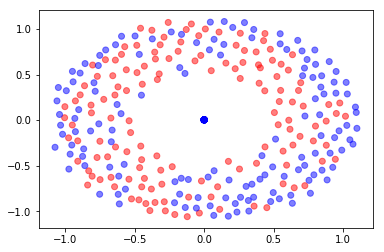

In [73]:
plt.scatter(x,y,c=colors, alpha=0.5)
plt.show()

In [74]:
colors2=[]
for q in range(len(cl)):
    if cl[q]==0:
        colors2.append('red')
    else:
        colors2.append('blue')

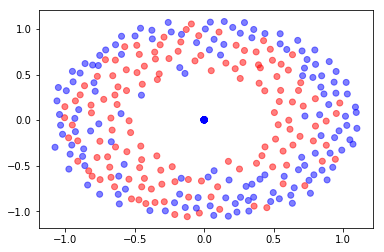

In [75]:
plt.scatter(x,y,c=colors2,alpha=0.5)
plt.show()

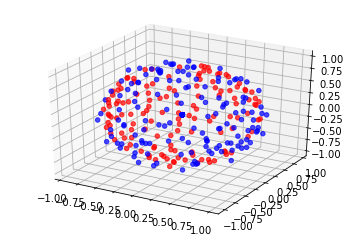

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=colors2, alpha=0.7)